# Finding Baby Yoda! 
As one of the groups of Darkside, we got a report from our spies that says Baby Yoda is in the galaxy and our spies shared possible coordinates. Our master young Anakin Skywalker wanted from these steps;
* Plotting the clusters with K-Means
* Find the coordinates of the planet where it is hidden! 
* Giving the coordinates to our master so he will use the force and give us possible **coordinates on the planet**

After getting the new coordinates, our master wants these steps;

* Use PCA (top 2components) to project the Dark Force
* Use KMeans
* Give him the coordinates of Baby Yoda then **he can eliminate him!**

![alt text](https://www.log.com.tr/wp-content/uploads/2019/12/The-Mandalorian-bebek-yoda-660x371.jpg "Great Danger Baby Yoda")


### Importing Libraries

In [387]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from math import sqrt


### Importing Dataset

In [385]:
df=pd.read_csv("/work/saving_baby_yoda/datasets/galaxies.csv")
df.head()

,X,Y
0,6.649504,2.223293
1,5.260232,-7.556045
2,6.164551,9.245618
3,5.033345,9.002009
4,3.674350,-7.836118


**Now we can plot planets with scatter plots!!**

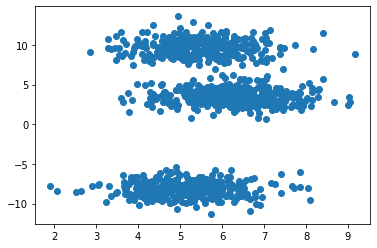

In [362]:
plt.scatter(df["X"],df["Y"])

Our master **Anakin Skywalker** thinks Baby Yoda is in the upper cluster

So lets create K-Means clusters.

In [363]:
X=df[["X","Y"]]
#Creating K Means object
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 8)
#Fitting
k_means.fit(X)

KMeans(n_clusters=3, n_init=8)

In [364]:
#Labels
labels = k_means.labels_

Creating variable for finding the first cluster

In [365]:
result = np.where(k_means_cluster_centers == np.amax(k_means_cluster_centers,))

result=int(result[1])
result

1

So, let's plot them!

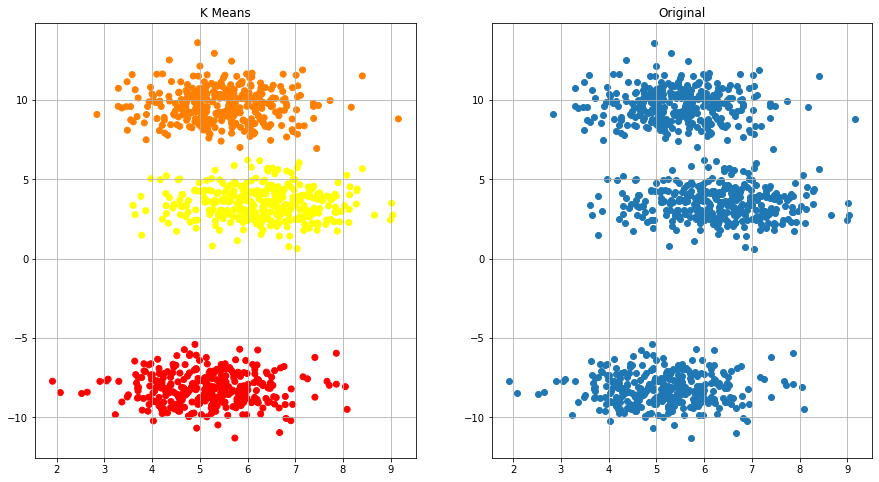

In [372]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(df["X"],df["Y"],c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(df["X"],df["Y"])
ax1.grid()
ax2.grid()

In [373]:
df["Labels"]=labels

Plotting upper cluster

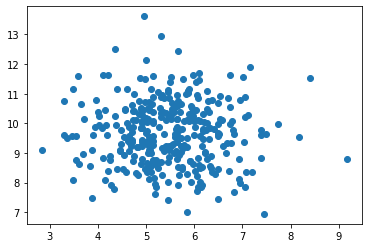

In [374]:
plt.scatter(df.loc[df["Labels"]==result]["X"],df.loc[df["Labels"]==result]["Y"])

Finding planet location where Baby Yoda is.

In [375]:
x_baby=df.loc[df["Labels"]==result]["X"].max()
y_baby=df.loc[df["X"]==x_baby,"Y"]

Marking the location of the planet

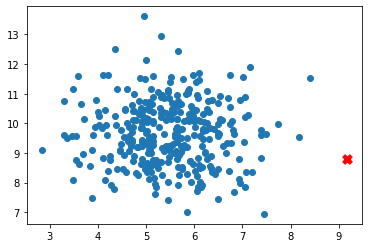

In [377]:
plt.scatter(df.loc[df["Labels"]==1]["X"],df.loc[df["Labels"]==1]["Y"])
plt.scatter(x_baby,y_baby,s=90, c='red', marker='X')

Now it is time to giving the location to our master **Anakin Skywalker**

In [378]:
print(x_baby)
print(y_baby)

9.16085726217318
199    8.807259
Name: Y, dtype: float64


Our master gave us a location dataset which name is "planet.csv"

Let's create data frame!


In [379]:
df_new=pd.read_csv("/work/saving_baby_yoda/datasets/planet.csv")
df_new.head()

,X,Y,Z,Temp,climate
0,-10.577706,2.279242,-0.865452,-8.438929,-9.494053
1,-7.427127,0.176410,-5.588608,-5.443329,-3.629749
2,-7.590300,7.121962,8.955229,-7.675402,8.909423
3,-8.850700,4.544747,0.616561,-7.159618,-8.560698
4,4.680549,-8.821567,5.156382,8.154624,9.046185


Time to apply PCA for creating only 2 components

In [380]:
# applying pca to find principal components
pca = PCA(n_components=2)

X_new=df_new[["X","Y","Z","Temp","climate"]].values

components = pca.fit_transform(X_new)

Finding the gravity center with K Means

In [381]:
model = KMeans(n_clusters=1)
model.fit(components)
gravity = model.predict(components)

gravity_center = model.cluster_centers_
gravity_center_x = gravity_center[:,0]
gravity_center_y = gravity_center[:,1]

# finds the distance between a point and all the others
def find_distance(point, points):
    distances = []
    for i, p in enumerate(points):
        distances.append(sqrt((point[:,0] - points[i,0])**2 + (point[:,1] - points[i,1])**2))
    
    return distances

dist = find_distance(centroids, components)

# find the closest point given a list of points and a list of distances
def closest_point(points, distances):

    val, idx = min((val, idx) for (idx, val) in enumerate(distances))

    return points[idx]

baby_coords = closest_point(components, dist)


Getting the principal components coordinates to plot the map and the gravity center coordinates to plot on to the map


In [382]:
# Getting principal components coordinates
xs = components[:, 0]
ys = components[:, 1]

# Getting the gravity center coordinates
gravity_center = model.cluster_centers_
gravity_center_x = gravity_center[:,0]
gravity_center_y = gravity_center[:,1]



Plotting location of the **Baby Yoda** with coordinates

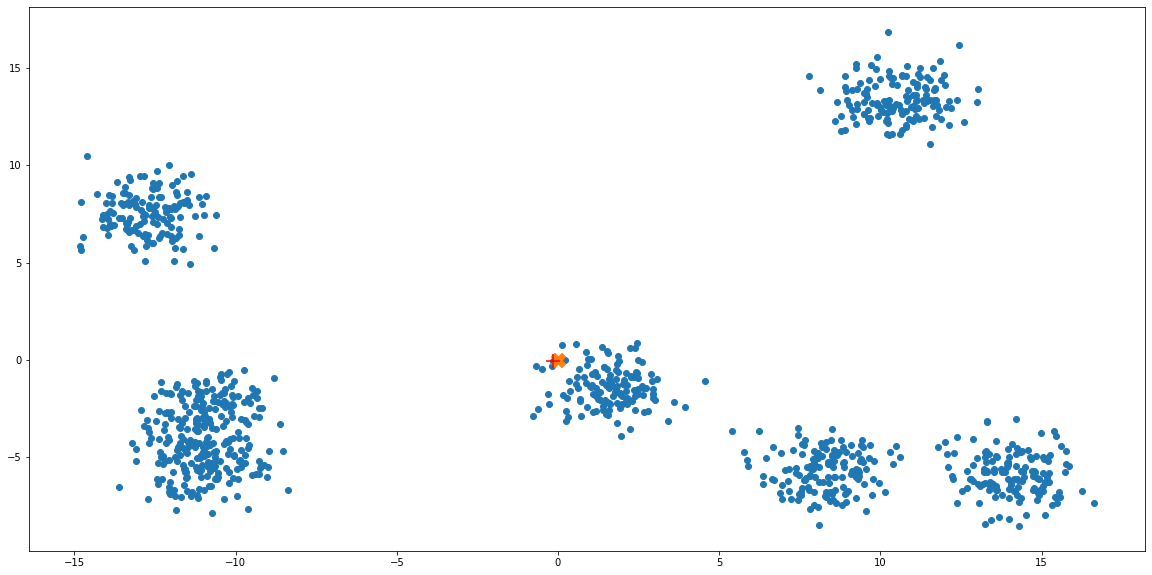

The coordinates of baby Yoda are: [-0.14618599 -0.0314799 ]
the the distance between them 
and the gravity center [[-6.98108238e-16  6.66133815e-16]]
is 0.14953703967474732


In [384]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x=xs, y=ys)
plt.scatter(x=gravity_center_x, y=gravity_center_y, marker='X', s=200)
plt.scatter(baby_coords[0], baby_coords[1], c='red', marker='+', s=200)
plt.show()

print(f'The coordinates of baby Yoda are: {baby_coords}')
print(f'the the distance between them \nand the gravity center {centroids}\nis {min(dist)}')

Now our master and baby will meet!
![alt text](https://static3.srcdn.com/wordpress/wp-content/uploads/2020/08/The-Mandalorian-Baby-Yoda-Anakin-Skywalker.jpg)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a70149da-7ba5-4906-a687-caea6d00d31b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>